
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from plotnine import *

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [4]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha["cp_is_0"] = (ha["cp"] == 0) * 1

ha["cp"] = ha["cp"].astype("str")
print(ha["cp"].value_counts().sort_index())
ha.head()


cp
0    128
1     44
2     81
3     20
Name: count, dtype: int64


,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [5]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp"]

knn_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))])

knn_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [6]:
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring="accuracy")
cv_scores.mean()

cross_val_score(knn_model, X, y,cv=5, scoring="f1_macro").mean()

np.float64(0.22881172431853275)

In [7]:
precision_cp0 = cross_val_score(knn_model, X, ha["cp_is_0"], cv=5, scoring="precision").mean()

recall_cp0 = cross_val_score(knn_model, X, ha["cp_is_0"], cv=5, scoring="recall").mean()

f1score_cp0 = cross_val_score(knn_model, X, ha["cp_is_0"], cv=5, scoring="f1").mean()

precision_cp0, recall_cp0, f1score_cp0

(np.float64(0.4533333333333333),
 np.float64(0.42276923076923073),
 np.float64(0.4347488224689628))

In [8]:
precision_cp1 = cross_val_score(knn_model, X, ha["cp_is_1"], cv=5, scoring="precision").mean()

recall_cp1 = cross_val_score(knn_model, X, ha["cp_is_1"], cv=5, scoring="recall").mean()

f1score_cp1 = cross_val_score(knn_model, X, ha["cp_is_1"], cv=5, scoring="f1").mean()

precision_cp1, recall_cp1, f1score_cp1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


(np.float64(0.23333333333333334),
 np.float64(0.04444444444444444),
 np.float64(0.06666666666666668))

In [9]:
cross_val_score(knn_model, X, ha["cp_is_1"], cv=5, scoring="precision")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


array([1.        , 0.        , 0.16666667, 0.        , 0.        ])

In [10]:
cross_val_score(knn_model, X, ha["cp_is_1"], cv=5, scoring="recall")

array([0.11111111, 0.        , 0.11111111, 0.        , 0.        ])

In [11]:
precision_cp2 = cross_val_score(knn_model, X, ha["cp_is_2"], cv=5, scoring="precision").mean()

recall_cp2 = cross_val_score(knn_model, X, ha["cp_is_2"], cv=5, scoring="recall").mean()

f1score_cp2 = cross_val_score(knn_model, X, ha["cp_is_2"], cv=5, scoring="f1").mean()

precision_cp2, recall_cp2, f1score_cp2

(np.float64(0.1261904761904762),
 np.float64(0.0985294117647059),
 np.float64(0.11044334975369459))

In [12]:
precision_cp3 = cross_val_score(knn_model, X, ha["cp_is_3"], cv=5, scoring="precision").mean()

recall_cp3 = cross_val_score(knn_model, X, ha["cp_is_3"], cv=5, scoring="recall").mean()

f1score_cp3 = cross_val_score(knn_model, X, ha["cp_is_3"], cv=5, scoring="f1").mean()

precision_cp3, recall_cp3, f1score_cp3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


(np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [13]:
dt_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth=2))]
)

dt_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2))])

[Text(0.5, 0.8333333333333334, 'age <= -0.311\ngini = 0.661\nsamples = 273\nvalue = [128, 44, 81, 20]'),
 Text(0.25, 0.5, 'trtbps <= 0.193\ngini = 0.679\nsamples = 95\nvalue = [32, 20, 38, 5]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.692\nsamples = 73\nvalue = [21, 20, 28, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.541\nsamples = 22\nvalue = [11, 0, 10, 1]'),
 Text(0.75, 0.5, 'trtbps <= 0.051\ngini = 0.625\nsamples = 178\nvalue = [96, 24, 43, 15]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.558\nsamples = 90\nvalue = [55.0, 15.0, 18.0, 2.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.67\nsamples = 88\nvalue = [41.0, 9.0, 25.0, 13.0]')]

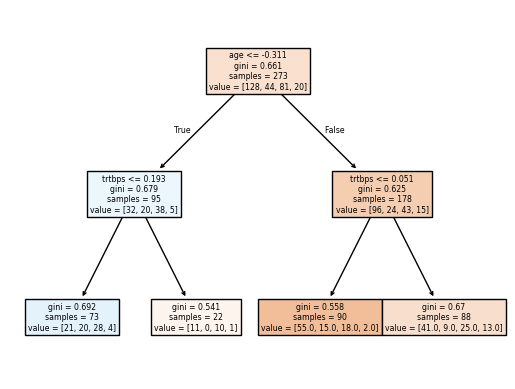

In [14]:
plot_tree(dt_model.named_steps["model"], feature_names=["trtbps", "chol", "age"], filled=True)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [15]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_3"]

logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())])

logistic_model.fit(X, y)


Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [16]:
cross_val_score(logistic_model, X, y, cv=5, scoring="precision").mean()

cross_val_score(logistic_model, X, y, cv=5, scoring="recall").mean()

cross_val_score(logistic_model, X, y, cv=5, scoring="f1").mean()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/

np.float64(0.0)

In [17]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_0"]

logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())])

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [18]:
cross_val_score(logistic_model, X, y, cv=5, scoring="precision").mean()
cross_val_score(logistic_model, X, y, cv=5, scoring="recall").mean()
cross_val_score(logistic_model, X, y, cv=5, scoring="f1").mean()

np.float64(0.4624250522492891)

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [19]:
ha_01 = ha[(ha["cp"] == "0") | (ha["cp"] == "1")]

X = ha_01[["trtbps", "chol", "age"]]
y = ha_01["cp"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())])

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [20]:
cross_val_score(logistic_model, X, y, cv=5, scoring="roc_auc").mean()

np.float64(0.6016623931623932)